## Galeria

Para evidenciar o desempenho do algoritmo desenvolvido ao longo das aulas, implementamos uma função que recebe apenas três argumentos, threshold_value, distance e prominence, além da imagem de entrada. Esses ajustes finos são essenciais para obter resultados de segmentação precisos. Como a configuração ideal varia entre diferentes padrões de escrita, propomos agrupar automaticamente os histogramas de projeção horizontal em clusters; cada cluster passa a ter um conjunto de parâmetros-padrão, padronizando o processo e dispensando calibrações manuais caso a caso.

### A função

In [32]:
from skimage.filters import threshold_otsu
from scipy.ndimage import gaussian_filter1d
from scipy.signal import find_peaks
import numpy as np

def segmentar_linhas(
        image,
        threshold_value=None,      # usa Otsu se None
        distance=5,               # distância mínima entre vales
        prominence=10,            # proeminência mínima do vale
        debug=False               # devolve binário + hist + vales?
    ):
    """
    Segmenta linhas horizontais em manuscritos.

    Parâmetros
    ----------
    image : ndarray
        Imagem em escala de cinza (0–1 ou 0–255).
    threshold_value : float ou None
        Limite de binarização; None => Otsu.
    distance : int
        Parâmetro 'distance' do find_peaks.
    prominence : float
        Parâmetro 'prominence' do find_peaks.
    debug : bool
        Se True, também retorna binary, proj_smooth e valleys.

    Retorna
    -------
    segments : list[tuple]
        (segmento_binário, y_topo, y_base) de cada linha.
    cut_points : ndarray[int]
        Posições y onde os cortes ocorreram.
    (opcional) binary : ndarray[bool]
    (opcional) proj_smooth : ndarray[float]
    (opcional) valleys : ndarray[int]
    """
    # 1) binarização
    if threshold_value is None:
        threshold_value = threshold_otsu(image)
    binary = image < threshold_value

    # 2) histograma horizontal + suavização
    proj = np.sum(binary, axis=1)
    proj_smooth = gaussian_filter1d(proj, sigma=5)

    # 3) detectar vales
    valleys, _ = find_peaks(-proj_smooth,
                            distance=distance,
                            prominence=prominence)

    # 4) pontos de corte
    cut_points = np.concatenate(([0], valleys, [binary.shape[0]]))

    # 5) recortar segmentos
    segments = [
        (binary[top:bottom, :], int(top), int(bottom))
        for top, bottom in zip(cut_points[:-1], cut_points[1:])
    ]

    if debug:
        return segments, cut_points, binary, proj_smooth, valleys
    else:
        return segments, cut_points

# Galeria 

### Imagem 1

In [33]:
# Caso queira, ver os passos intermediários,  
# Utilize debug=True

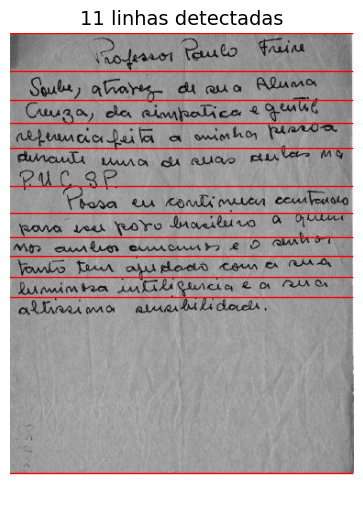

In [35]:
# ======================================
# Segmentação rápida (debug=False)
# ======================================

# (Se a imagem já estiver em `image`, pule as duas linhas seguintes)
image_path = "imagens/EC[Manuscritos]_01-IMS.jpg"
image = imread(image_path, as_gray=True)

# 1) Executa o pipeline com parâmetros-padrão
linhas, cortes = segmentar_linhas(image)   # debug=False é o default

# 2) Mostra resultado final
plt.figure(figsize=(8, 6))
plt.imshow(image, cmap="gray")
for y in cortes:
    plt.axhline(y, color="red", linewidth=1)
plt.title(f"{len(linhas)} linhas detectadas", fontsize=14)
plt.axis("off")
plt.show()

### Imagem 2

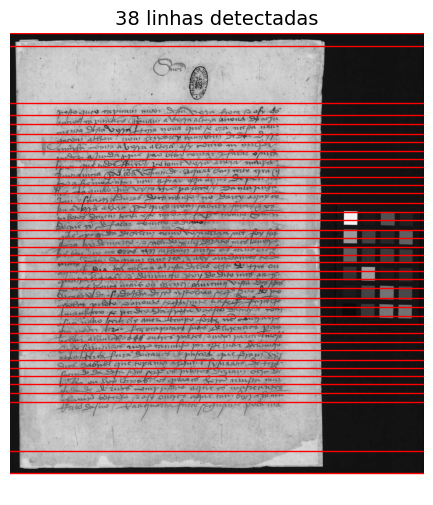

In [36]:
# ======================================
# Segmentação rápida (debug=False)
# ======================================

# (Se a imagem já estiver em `image`, pule as duas linhas seguintes)
image_path = "imagens/01-PVC-01-05-1500-1_pero_vaz.jpg"
image = imread(image_path, as_gray=True)

# 1) Executa o pipeline com parâmetros-padrão
linhas, cortes = segmentar_linhas(image)   # debug=False é o default

# 2) Mostra resultado final
plt.figure(figsize=(8, 6))
plt.imshow(image, cmap="gray")
for y in cortes:
    plt.axhline(y, color="red", linewidth=1)
plt.title(f"{len(linhas)} linhas detectadas", fontsize=14)
plt.axis("off")
plt.show()

### Imagem 3

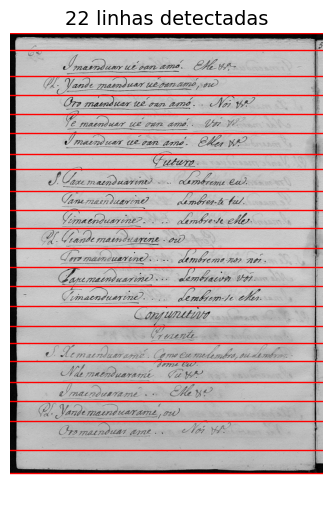

In [37]:
# ======================================
# Segmentação rápida (debug=False)
# ======================================

# (Se a imagem já estiver em `image`, pule as duas linhas seguintes)
image_path = "imagens/Domingos Alves Branco Moniz Barreto_1748-Copy1.jpg"
image = imread(image_path, as_gray=True)

# 1) Executa o pipeline com parâmetros-padrão
linhas, cortes = segmentar_linhas(image)   # debug=False é o default

# 2) Mostra resultado final
plt.figure(figsize=(8, 6))
plt.imshow(image, cmap="gray")
for y in cortes:
    plt.axhline(y, color="red", linewidth=1)
plt.title(f"{len(linhas)} linhas detectadas", fontsize=14)
plt.axis("off")
plt.show()

### Imagem 4

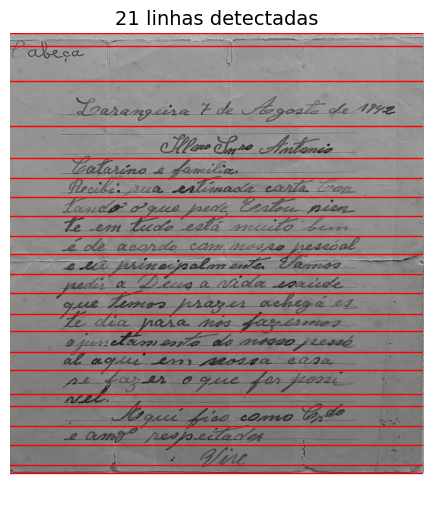

In [38]:
# ======================================
# Segmentação rápida (debug=False)
# ======================================

# (Se a imagem já estiver em `image`, pule as duas linhas seguintes)
image_path = "imagens/02-MEP-07-08-1942-1.jpeg"
image = imread(image_path, as_gray=True)

# 1) Executa o pipeline com parâmetros-padrão
linhas, cortes = segmentar_linhas(image)   # debug=False é o default

# 2) Mostra resultado final
plt.figure(figsize=(8, 6))
plt.imshow(image, cmap="gray")
for y in cortes:
    plt.axhline(y, color="red", linewidth=1)
plt.title(f"{len(linhas)} linhas detectadas", fontsize=14)
plt.axis("off")
plt.show()

### Imagem 5: Comparação 

A última imagem foi retirado do github <a href = https://github.com/muthuspark/line-segmentation-handwritten-doc/tree/master > "line-segmentation-handwritten-doc
Public"</a> e servirá de validação para o nosso modelo

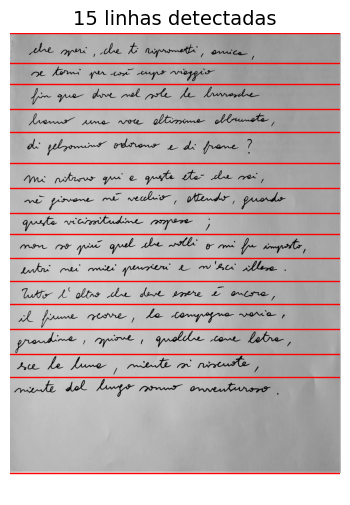

In [39]:
# ======================================
# Segmentação rápida (debug=False)
# ======================================

# (Se a imagem já estiver em `image`, pule as duas linhas seguintes)
image_path = "imagens/luzi2.png"
image = imread(image_path, as_gray=True)

# 1) Executa o pipeline com parâmetros-padrão
linhas, cortes = segmentar_linhas(image,
    distance=8,      # ajuste se necessário
    prominence=25,   # ajuste se necessário
    debug=False)   # debug=False é o default

# 2) Mostra resultado final
plt.figure(figsize=(8, 6))
plt.imshow(image, cmap="gray")
for y in cortes:
    plt.axhline(y, color="red", linewidth=1)
plt.title(f"{len(linhas)} linhas detectadas", fontsize=14)
plt.axis("off")
plt.show()

Pronto! Conseguimos obter um resultado comparável àquele apresentado no notebook `A* Path Planning Line Segmentation Algorithm.ipynb`do repositório.